My Questions       
1) surving rate according to age and gender        
2) what are the variables correlating each other               
3) finding patterns on correlating variable       
4) distribution of age based on gender

loading datas

In [33]:
%matplotlib inline
# importing all the necessary library
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math
titanic_data = pd.read_csv('./titanic-data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# variables    
1) passengerId - unique id for each passangers                              
2) survived - shows the passanger is survied or not                                        
3) Pclass - shows type of class which passanger travelling eg: economic or buisness class                            
4) Sex - Gender of the passanger                                                  
5) Age - age of an passanger                                                     
6) Sibsp - no of sibbling in the titanic                                              
7) Parch - no of parents in the titanic                                                     
8) Fare - ticket price of a passanger                                            
8) embarked- port of embarkation                               

# data cleaning 
Name, cabin and ticket won't be helpful in analysis so i'm removing


In [6]:
# column droping function
def drop(data,col_name):
    return data.drop(col_name,axis=1)
titanic_data=drop(titanic_data,'Name')
titanic_data=drop(titanic_data,'Cabin')
titanic_data=drop(titanic_data,'Ticket')
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


sex and embarked are in string if we make that categorial variable into numbers it'll be easy for us to do correlation

In [7]:
#apply function for changing categorical variable to number
def sex_to_numeric(item):
    if item == 'male':
        item = 1
    else:
        item = 2
    return item
def embarked_to_numeric(item):
    if item == 'C':
        item = 1
    elif item == 'Q':
        item = 2
    else:
        item = 3
    return item
titanic_data['Sex']=titanic_data.Sex.apply(sex_to_numeric)
titanic_data['Embarked']=titanic_data.Embarked.apply(embarked_to_numeric)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,3
1,2,1,1,2,38.0,1,0,71.2833,1
2,3,1,3,2,26.0,0,0,7.9250,3
3,4,1,1,2,35.0,1,0,53.1000,3
4,5,0,3,1,35.0,0,0,8.0500,3


now we describe the data to see the basic stat

In [8]:
# info used for getting the datatype and number of row data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int64
dtypes: float64(2), int64(7)
memory usage: 62.7 KB


# finding null value
age looks like having null value we'll find by isnull

In [9]:
#getting the count of null values in age
titanic_data.isnull().groupby(['Age']).count()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
Age,,,,,,,,
False,714,714,714,714,714,714,714,714
True,177,177,177,177,177,177,177,177


# filling missing value
We can remove missing value but it leads to loss of data so we'll fill the missing value with mean

In [10]:
#filling the missing value with mean
titanic_data.Age=titanic_data.Age.fillna(round(titanic_data.Age.mean()))
titanic_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,1.352413,29.758889,0.523008,0.381594,32.204208,2.536476
std,257.353842,0.486592,0.836071,0.477990,13.002570,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,1.000000,22.000000,0.000000,0.000000,7.910400,2.000000
50%,446.000000,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,3.000000
75%,668.500000,1.000000,3.000000,2.000000,35.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200,3.000000


# spliting data 
spliting data according to the gender

In [11]:
#splitting the data if sex = 1 it'll be male if sex is 2 then it'll be female
Male_data=titanic_data[titanic_data.Sex == 1]
Female_data = titanic_data[titanic_data.Sex == 2]

# Correlation 
finding correlation on the dataset

In [12]:
#corr used for finding corelation
titanic_data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033019,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.070657,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.329727,0.083081,0.018443,-0.549500,0.162098
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084660,0.114631,0.245489,0.182333,-0.108262
Age,0.033019,-0.070657,-0.329727,-0.084660,1.000000,-0.232440,-0.180330,0.090632,-0.028159
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232440,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,0.245489,-0.180330,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,0.182333,0.090632,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,-0.108262,-0.028159,0.068230,0.039798,-0.224719,1.000000


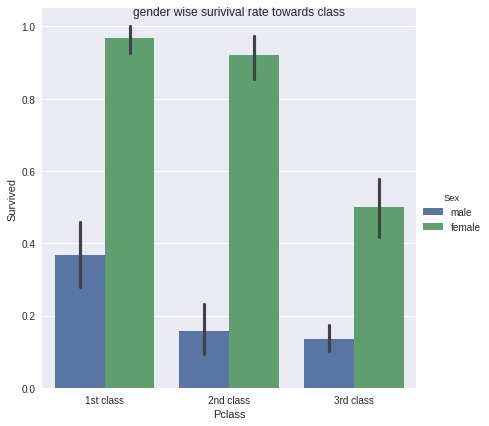

In [15]:
#ploting gender wise survival rate according towards class
def age_numeric_to_categoric(item):
    if item == 1:
        item = 'male'
    else:
        item = 'female'
    return item
temp = titanic_data
temp.Sex=titanic_data.Sex.apply(age_numeric_to_categoric)
g=sns.factorplot(data=temp,x='Pclass',y='Survived',hue='Sex',kind='bar',size=6)
g.fig.suptitle("gender wise surivival rate towards class")
g.set_xticklabels(['1st class','2nd class','3rd class'])

# FactorPlot 
in the above plot shows clearly that female survival rate is way higher than         
male in all the three class

In [16]:
titanic_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.033019,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.070657,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,-0.329727,0.083081,0.018443,-0.549500,0.162098
Age,0.033019,-0.070657,-0.329727,1.000000,-0.232440,-0.180330,0.090632,-0.028159
SibSp,-0.057527,-0.035322,0.083081,-0.232440,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.180330,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,0.090632,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,-0.028159,0.068230,0.039798,-0.224719,1.000000


some of the interesting correlation are        
1) age and class  

correlation between age and class


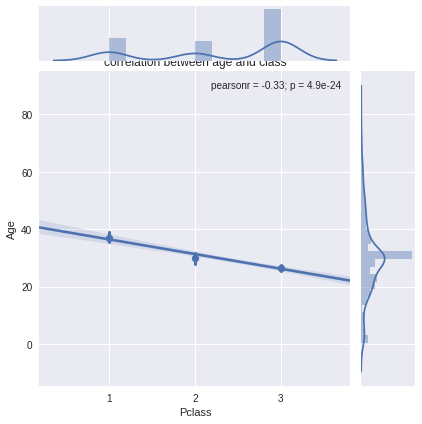

In [17]:
print "correlation between age and class"
g=sns.jointplot('Pclass','Age',data=titanic_data,kind='reg',x_bins=4)
g.ax_joint.set_xticks([1,2,3])
g.ax_joint.set_title("correlation between age and class")

# age and class correlation
depends on age they taking class for example if you age is higher they taking 1'st class if age is lower they taking lower class

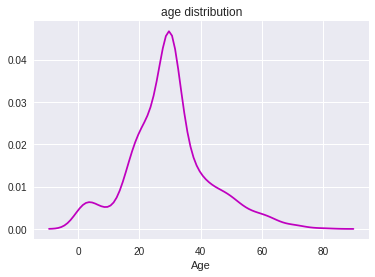

In [18]:
g=sns.distplot(titanic_data.Age,hist=False,color='m')
g.set_title('age distribution')

  # age distribution
  the above distribution shows clearly the distibution of all the age you see that there is little bump in the range between 5 to 8 it shows that a significant amout children also travelling in the titanic

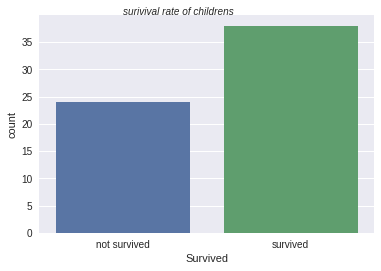

In [19]:
# splitting data further to children
children_data = titanic_data[titanic_data.Age < 10]
ax=sns.countplot(data=children_data,x='Survived')
ax.set_xticklabels(['not survived','survived'])
ax.text(0, 40,'surivival rate of childrens', style='italic')

# count plot of children
it clearly shows that half the childrens are survived

In [20]:
titanic_data.Age.mean()-(1.96)*(titanic_data.Age.std()/math.sqrt(891)),titanic_data.Age.mean()+(1.96)*(titanic_data.Age.std()/math.sqrt(891))

(28.905108015964554, 30.612669761813219)

# confidance interval of age
age distribution which have a confidence interval of 29 to 31 (roughfly)

In [21]:
# basic stat of male and female dataset
print Male_data.describe()
print Female_data.describe()

       PassengerId    Survived      Pclass    Sex         Age       SibSp  \
count   577.000000  577.000000  577.000000  577.0  577.000000  577.000000   
mean    454.147314    0.188908    2.389948    1.0   30.570485    0.429809   
std     257.486139    0.391775    0.813580    0.0   13.006049    1.061811   
min       1.000000    0.000000    1.000000    1.0    0.420000    0.000000   
25%     222.000000    0.000000    2.000000    1.0   23.000000    0.000000   
50%     464.000000    0.000000    3.000000    1.0   30.000000    0.000000   
75%     680.000000    0.000000    3.000000    1.0   35.000000    0.000000   
max     891.000000    1.000000    3.000000    1.0   80.000000    8.000000   

            Parch        Fare    Embarked  
count  577.000000  577.000000  577.000000  
mean     0.235702   25.523893    2.599653  
std      0.612294   43.138263    0.755213  
min      0.000000    0.000000    1.000000  
25%      0.000000    7.895800    3.000000  
50%      0.000000   10.500000    3.000000 

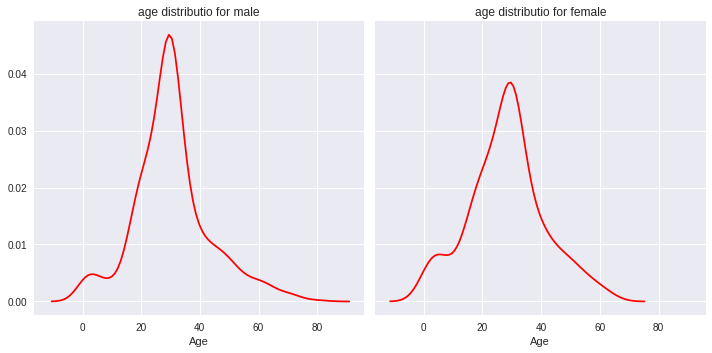

In [22]:
# distribution for age according to gendet
grid = sns.FacetGrid(titanic_data,col='Sex',size=5)
g = grid.map(sns.distplot,'Age',hist=False,color='r')
for ax,title in zip(g.axes.flat,['male','female']):
    ax.set_title('age distributio for '+title)

# gender wise age distribution
the distribution clearly shows that there is a signifcant diffrence in age we'll confirm this by calculating confidance interval

In [23]:
# confidance interval
print 'confidance interval fot male'
print Male_data.Age.mean()-(1.96)*(Male_data.Age.std()/math.sqrt(577)),Male_data.Age.mean()+(1.96)*(Male_data.Age.std()/math.sqrt(891))
print 'confidance interval fot female'
print Female_data.Age.mean()-(1.96)*(Female_data.Age.std()/math.sqrt(314)),Female_data.Age.mean()+(1.96)*(Female_data.Age.std()/math.sqrt(314))

confidance interval fot male
29.5092454053 31.4244945873
confidance interval fot female
26.8424379758 29.6925938713


# age diffrence
female are slight younger than male

In [30]:
print "male survived "+str(Male_data[Male_data.Survived==1].Survived.count())
print "male not survvied "+str(Male_data[Male_data.Survived==0].Survived.count())
print "female survived "+str(Female_data[Female_data.Survived==1].Survived.count())
print "female not survived "+str(Female_data[Female_data.Survived==0].Survived.count())

male survived 109
male not survvied 468
female survived 233
female not survived 81


In [38]:
#chi square test
_,p,_,_=chi2_contingency([[109,468],[233,81]])
print p

1.19735706278e-58


# result of chisquare test
it is not less that 0.5 so the gender does not affect the survival rate

# Conclusion   
The size of data set was 891. The missing age data of passengers reduced the accuracy of results otherwise if data was complete, then we would have calculated the age-ranges survival rate.
# Communication
some of the finding from the analysis                                      
1)here we found that surving rate in female is higher than male  (check factor plot)                                
2)there is coorelation between age and class which they travelling if they have lesser age they travelling in low class(regression analysis that we made using joint plot)                                                     
3)females are bit younger than males while comparing (confidance interval of men and women shows that clearly)             
4)half of the childrens survived(count plot of children clearly states that half the chilrens are survived)             